# &#x1F4DD; Report Project 4

# &#x26D4; [REPORT.ipynb on nbviewer](https://nbviewer.org/github/setrar/MALIS/blob/MALIS-2023/projects/proj4/REPORT.ipynb)

In [30]:
using Flux, MLDatasets, LinearAlgebra

In [31]:
using Flux: onehotbatch

In [32]:
using NPZ

In [33]:
# Load the dataset
dataset = npzread("data/bloodmnist.npz")

Dict{String, Array{UInt8}} with 6 entries:
  "train_labels" => [0x07; 0x03; … ; 0x06; 0x04;;]
  "test_labels"  => [0x03; 0x00; … ; 0x01; 0x07;;]
  "val_labels"   => [0x04; 0x00; … ; 0x01; 0x06;;]
  "test_images"  => [0xe8 0xe5 … 0xac 0xaf; 0xef 0xe3 … 0xb6 0xb8; … ; 0xe1 0xd…
  "val_images"   => [0xff 0xff … 0xc3 0xb9; 0xff 0xe7 … 0xfe 0xea; … ; 0xca 0xc…
  "train_images" => [0xfa 0xff … 0xd7 0xd9; 0xff 0xfd … 0xfe 0xfe; … ; 0xcd 0xc…

In [34]:
imgs = dataset["train_images"]; @show Float64.(imgs[1:4]), typeof(imgs), size(imgs);

(Float64.(imgs[1:4]), typeof(imgs), size(imgs)) = ([250.0, 255.0, 185.0, 226.0], Array{UInt8, 4}, (11959, 28, 28, 3))


In [35]:
using Plots, Images

In [36]:
using ImageView  # Packages for image handling and visualization

In [37]:
# Assuming `train_dataset` is an array of images
function create_montage(images, length)
    # This is a simple example where we take the first `length` images and concatenate them
    # In a real-world scenario, you would handle resizing and arranging the images as needed
    hcat(images[1:length]...)
end

create_montage (generic function with 1 method)

In [38]:
index = 11950; img = Float32.(imgs[index, :, :, 2]);

In [39]:
# Create a montage of the training dataset images (length=1 implies a single image)
# This part is highly dependent on the specific visualization functions available in Julia
montage = create_montage(img, 28)

# Visualize the montage
imshow(montage)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(accessible-role=GT…
  "roi"         => Dict{String, Any}("redraw"=>ObserverFunction[ObserverFunctio…
  "annotations" => Observable(Dict{UInt64, Any}())
  "clim"        => Observable(CLim{Float32}(180.0, 224.0))

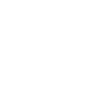

In [40]:
# view training input

index = 11950; img = Float32.(imgs[index, :, :, 2])

# use the ' transpose sign to invert the image

colorview(Gray, img)


&#x1F4D1; Note: `colorview` function also output an external image from Jupyter Notebook show below

<img src=images/colorview_output.png width='' height='' > </img>

In [42]:
# Extract images and labels
imgs = Float32.(dataset["train_images"]); @show imgs[1:4], typeof(imgs);

(imgs[1:4], typeof(imgs)) = (Float32[250.0, 255.0, 185.0, 226.0], Array{Float32, 4})


In [43]:
using Plots, Images

In [44]:
index = 1

1

In [45]:
img = imgs[:,:,:,index]; @show typeof(img[:,:,index]), typeof(img);

(typeof(img[:, :, index]), typeof(img)) = (Matrix{Float32}, Array{Float32, 3})


In [46]:
colorview( Gray, img[:,:,index]);

In [47]:
labels = dataset["train_labels"]; @show labels[1:4], typeof(labels), length(labels);

(labels[1:4], typeof(labels), length(labels)) = (UInt8[0x07, 0x03, 0x06, 0x06], Matrix{UInt8}, 11959)


In [48]:
nTrain = length(labels)

11959

In [49]:
using BenchmarkTools

In [50]:
@btime trainData = vcat([hcat(float.(imgs[i])...)  for i in 1:nTrain]...);

  4.422 ms (83215 allocations: 2.32 MiB)


In [51]:
trainData = vcat([hcat(float.(imgs[i])...)  for i in 1:nTrain]...);

In [52]:
@show typeof(trainData), length(trainData)

(typeof(trainData), length(trainData)) = (Matrix{Float32}, 11959)


(Matrix{Float32}, 11959)

In [53]:
trainLabels = labels[1:nTrain];

# &#x1F4DA; References

- [ ] [MedMNIST v2 - A large-scale lightweight benchmark
for 2D and 3D biomedical image classification](https://arxiv.org/pdf/2110.14795.pdf)

<table>
  <thead>
    <tr>
      <th>Name</th>
      <th>Source</th>
      <th>Data Modality</th>
      <th>Task (# Classes / Labels)</th>
      <th># Samples</th>
      <th># Training / Validation / Test</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>BloodMNIST</td>
      <td>Acevedo et al.</td>
      <td>Blood Cell Microscope</td>
      <td>MC (8)</td>
      <td>17,092</td>
      <td>11,959 / 1,712 / 3,421</td>
    </tr>
  </tbody>
</table>


- [ ] [\[05x08\] Intro to Artificial Neural Networks with Flux.jl (1 of 2); Julia Supervised Machine Learning](https://www.youtube.com/watch?v=zmlulaxatRs)